<a href="https://colab.research.google.com/github/DITHAAAA/114_Ditha-Tul-Nugraha_Posttest2_DataMining/blob/main/2109116114_Ditha_Tul_Nugraha_Posttest_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>Posttest 2 Data Mining</h2>

Nama : Ditha Tul Nugraha

NIM  : 2109116114

Kelas : C 2021

# (1) Apriori

Gunakan dataset ini : https://drive.google.com/file/d/1BqC-2d1ZYqFIFwdjdsW5bAAqNFh2AO4C/view?usp=share_link

Dan buatlah daftar support dan confidence untuk 2 item set dengan menggunakan dataset tersebut (hint : buatlah tabel tabulasi terlebih dahulu untuk memudahkan)

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("dataset_market_basket.csv")
df

,whole milk,pasrty,salty snack,sausage,semi-finished bread,yogurt,soda,pickled vegetables,canned beer,misc. beverages,...,tropical fruit,sugar,butter milk,specialty chocolate,frozen meals,dental care,root vegetables,detergent,dish cleaner,cling film/bags
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# 1 Item Set
df.sum()

whole milk             5
pasrty                 1
salty snack            2
sausage                4
semi-finished bread    1
yogurt                 1
soda                   3
pickled vegetables     1
canned beer            1
misc. beverages        1
hygiene articles       1
rolls/buns             4
frankfurter            2
whipped/sour cream     1
curd                   1
beef                   1
white bread            1
butter                 1
frozen vegetables      1
other vegetables       1
tropical fruit         1
sugar                  1
butter milk            1
specialty chocolate    1
frozen meals           1
dental care            1
root vegetables        1
detergent              1
dish cleaner           1
cling film/bags        1
dtype: int64

In [4]:
# Item pada kolom
df.columns

Index(['whole milk', 'pasrty', 'salty snack', 'sausage', 'semi-finished bread',
       'yogurt', 'soda', 'pickled vegetables', 'canned beer',
       'misc. beverages', 'hygiene articles', 'rolls/buns', 'frankfurter',
       'whipped/sour cream', 'curd', 'beef', 'white bread', 'butter',
       'frozen vegetables', 'other vegetables', 'tropical fruit', 'sugar',
       'butter milk', 'specialty chocolate', 'frozen meals', 'dental care',
       'root vegetables', 'detergent', 'dish cleaner', 'cling film/bags'],
      dtype='object')

In [5]:
# 2 Item Set
from itertools import permutations

# Extract Unique Items
rules = list(permutations(df.columns, 2))
rules

[('whole milk', 'pasrty'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'sausage'),
 ('whole milk', 'semi-finished bread'),
 ('whole milk', 'yogurt'),
 ('whole milk', 'soda'),
 ('whole milk', 'pickled vegetables'),
 ('whole milk', 'canned beer'),
 ('whole milk', 'misc. beverages'),
 ('whole milk', 'hygiene articles'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'frankfurter'),
 ('whole milk', 'whipped/sour cream'),
 ('whole milk', 'curd'),
 ('whole milk', 'beef'),
 ('whole milk', 'white bread'),
 ('whole milk', 'butter'),
 ('whole milk', 'frozen vegetables'),
 ('whole milk', 'other vegetables'),
 ('whole milk', 'tropical fruit'),
 ('whole milk', 'sugar'),
 ('whole milk', 'butter milk'),
 ('whole milk', 'specialty chocolate'),
 ('whole milk', 'frozen meals'),
 ('whole milk', 'dental care'),
 ('whole milk', 'root vegetables'),
 ('whole milk', 'detergent'),
 ('whole milk', 'dish cleaner'),
 ('whole milk', 'cling film/bags'),
 ('pasrty', 'whole milk'),
 ('pasrty', 'salty snack'),
 ('

In [6]:
# Filter Item Kombinasi
rule_baru = []
for rule in rules:
# Memfilter dengan nama kolom
  if len(df[(df[rule[0]]==1) & (df[rule[1]]==1)]) >0:
    rule_baru.append(rule)
rule_baru

[('whole milk', 'pasrty'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'sausage'),
 ('whole milk', 'semi-finished bread'),
 ('whole milk', 'yogurt'),
 ('whole milk', 'soda'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'butter'),
 ('pasrty', 'whole milk'),
 ('pasrty', 'salty snack'),
 ('salty snack', 'whole milk'),
 ('salty snack', 'pasrty'),
 ('salty snack', 'root vegetables'),
 ('salty snack', 'detergent'),
 ('sausage', 'whole milk'),
 ('sausage', 'semi-finished bread'),
 ('sausage', 'yogurt'),
 ('sausage', 'hygiene articles'),
 ('sausage', 'rolls/buns'),
 ('semi-finished bread', 'whole milk'),
 ('semi-finished bread', 'sausage'),
 ('semi-finished bread', 'yogurt'),
 ('yogurt', 'whole milk'),
 ('yogurt', 'sausage'),
 ('yogurt', 'semi-finished bread'),
 ('soda', 'whole milk'),
 ('soda', 'pickled vegetables'),
 ('soda', 'frankfurter'),
 ('soda', 'whipped/sour cream'),
 ('pickled vegetables', 'soda'),
 ('canned beer', 'misc. beverages'),
 ('misc. beverages', 'canned beer'),
 ('hy

In [7]:
hitung = {}
for rule in rule_baru:
  banyak_data= len(df[
      (df[rule[0]]==1) & (df[rule[1]]==1)
  ])
  hitung[str(rule)] = banyak_data

hitung

{"('whole milk', 'pasrty')": 1,
 "('whole milk', 'salty snack')": 1,
 "('whole milk', 'sausage')": 2,
 "('whole milk', 'semi-finished bread')": 1,
 "('whole milk', 'yogurt')": 1,
 "('whole milk', 'soda')": 1,
 "('whole milk', 'rolls/buns')": 1,
 "('whole milk', 'butter')": 1,
 "('pasrty', 'whole milk')": 1,
 "('pasrty', 'salty snack')": 1,
 "('salty snack', 'whole milk')": 1,
 "('salty snack', 'pasrty')": 1,
 "('salty snack', 'root vegetables')": 1,
 "('salty snack', 'detergent')": 1,
 "('sausage', 'whole milk')": 2,
 "('sausage', 'semi-finished bread')": 1,
 "('sausage', 'yogurt')": 1,
 "('sausage', 'hygiene articles')": 1,
 "('sausage', 'rolls/buns')": 2,
 "('semi-finished bread', 'whole milk')": 1,
 "('semi-finished bread', 'sausage')": 1,
 "('semi-finished bread', 'yogurt')": 1,
 "('yogurt', 'whole milk')": 1,
 "('yogurt', 'sausage')": 1,
 "('yogurt', 'semi-finished bread')": 1,
 "('soda', 'whole milk')": 1,
 "('soda', 'pickled vegetables')": 1,
 "('soda', 'frankfurter')": 1,
 "('s

In [8]:
len(df)

19

In [9]:
supp = [i/len(df)*100 for i in hitung.values()]
print(supp)
for item,support in hitung.items():
  print(f"{item} support = {round(support/len(df)*100)}%")

[5.263157894736842, 5.263157894736842, 10.526315789473683, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 10.526315789473683, 5.263157894736842, 5.263157894736842, 5.263157894736842, 10.526315789473683, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 10.526315789473683, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.26315

In [10]:
for item,ab in hitung.items():
  i = eval(item)
  print(f"{i[0]}->{i[1]} Confidence = {ab/df[i[0]].sum()*100}%")

whole milk->pasrty Confidence = 20.0%
whole milk->salty snack Confidence = 20.0%
whole milk->sausage Confidence = 40.0%
whole milk->semi-finished bread Confidence = 20.0%
whole milk->yogurt Confidence = 20.0%
whole milk->soda Confidence = 20.0%
whole milk->rolls/buns Confidence = 20.0%
whole milk->butter Confidence = 20.0%
pasrty->whole milk Confidence = 100.0%
pasrty->salty snack Confidence = 100.0%
salty snack->whole milk Confidence = 50.0%
salty snack->pasrty Confidence = 50.0%
salty snack->root vegetables Confidence = 50.0%
salty snack->detergent Confidence = 50.0%
sausage->whole milk Confidence = 50.0%
sausage->semi-finished bread Confidence = 25.0%
sausage->yogurt Confidence = 25.0%
sausage->hygiene articles Confidence = 25.0%
sausage->rolls/buns Confidence = 50.0%
semi-finished bread->whole milk Confidence = 100.0%
semi-finished bread->sausage Confidence = 100.0%
semi-finished bread->yogurt Confidence = 100.0%
yogurt->whole milk Confidence = 100.0%
yogurt->sausage Confidence = 1

#(2) KNN

Gunakan dataset ini : https://drive.google.com/file/d/1pXAJZZXCXosf0PTJkyogopKaPFxCYl22/view?usp=share_link

Kemudian buatlah tabel jarak berdasarkan data berikut ini : 

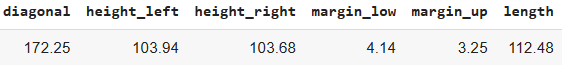
<!-- 1412 -->

In [11]:
# 1. Tambahkan kolom jarak untuk menampilkan jarak dari dataset terhadap target prediksi

import pandas as pd
import numpy as np

df = pd.read_csv('deteksi_uang_palsu.csv')

# Memisahkan fitur dan terget
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Memisahkan jarak dari setiap data point ke target prediksi 
distances = np.sqrt(np.sum((X - y.values.reshape(-1, 1)) ** 2, axis=1))
df['Jarak'] = distances

# Menyimpan hasil ke file CSV
df.to_csv('hasil_jarak.csv', index=False)

df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,Jarak
0,True,172.06,104.24,103.66,4.24,3.10,113.02,200.285783
1,True,171.66,103.68,103.41,4.35,3.33,113.74,201.070850
2,True,172.23,104.00,103.35,4.43,2.95,113.12,200.485558
3,True,172.07,104.21,103.82,4.29,3.35,113.30,200.524023
4,True,171.79,104.57,104.04,4.26,3.15,113.46,200.774364
5,False,172.00,104.23,104.52,5.76,3.37,110.94,196.866414
6,False,171.56,104.03,103.93,5.47,3.50,111.67,197.874877
7,False,171.90,104.33,104.40,4.70,3.31,112.12,199.106750
8,False,171.84,104.06,104.10,4.87,3.25,111.04,197.520021
9,False,172.11,104.14,104.15,4.84,3.28,110.98,197.514206


In [12]:
# 2. Urutkan data berdasarkan K jarak terdekat (Untuk K nya ambil akar 2 dari banyak data)

# Membaca dataset dari file CSV
df = pd.read_csv('deteksi_uang_palsu.csv')

# Memisahkan fitur dan target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Menghitung jarak dari setiap data point ke target prediksi
distances = np.sqrt(np.sum((X - y.values.reshape(-1, 1)) ** 2, axis=1))

# Mengambil K jarak terdekat
K = int(np.sqrt(len(df)))
indices = np.argsort(distances)[:K]

# Mengurutkan data berdasarkan K jarak terdekat
df_sorted = df.iloc[indices].reset_index(drop=True)

# Menyimpan hasil ke fil CSV
df_sorted.to_csv('sorted.csv', index=False)

# Hasil file csv dari pnambahan kolom jarak
df_sorted = pd.read_csv('sorted.csv')
df_sorted

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,False,172.00,104.23,104.52,5.76,3.37,110.94
1,False,172.11,104.14,104.15,4.84,3.28,110.98
2,False,171.84,104.06,104.10,4.87,3.25,111.04


In [13]:
# 3. Tentukan apa hasil prediksinya berdasarkan label terbanyak

# Load dataset
df = pd.read_csv("deteksi_uang_palsu.csv")

# Hitung jumlah masing-masing label
label_counts = df["is_genuine"].value_counts()

# Tampilkan label terbanyak
print("Label terbanyak adalah", label_counts.idxmax())

Label terbanyak adalah True


# (3) Analisis

> Nama : Ditha Tul Nugraha

> Nim : 2109116114


Penjelasan posttest : 

Pilihlah salah satu tema dari daftar tema ini :  
1. Perbankan
2. Kesehatan
3. Ritel
4. Pendidkan

Kemudian lakukan analisis dengan menggunakan struktur CRISP-DM

Dimulai dari Business Understanding Hingga Data Preparation 
<img src="https://th.bing.com/th/id/R.f8efea41ae3cd96d86fbc5b10f81ad77?rik=K4Dr%2biIaVGvW8g&riu=http%3a%2f%2fwww.dataprix.com%2ffiles%2fCRISPDM%2fMetodologia_CRISP_DM1_html_52cdbecf.png&ehk=6ONLJMCVxE421Sjt2JJPE6MfCzrL7LLhDZQPdkJTLcw%3d&risl=&pid=ImgRaw&r=0"/>

Tentukan judul dengan ketentuan setiap orang di kelas beda-beda judulnya dan sumber datasetnya (contoh bisa prediksi atau aturan asosiasi)

Catatan : Tugas ini akan berhubungan dengan posttest terakhir (pertemuan 6)

# Bussines Understanding

pada

# Data Understanding

In [15]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
sns.set(style = 'whitegrid')
import textwrap

# Collect Initial Data

In [21]:
df = pd.read_csv("dataset-pinjaman-nasabah.csv")
df

,ID_Nasabah,JenisKelamin,StatusPernikahan,JumTanggungan,Pendidikan,Wiraswasta,IncomeNasabah,IncomePasangan,JumlahPinjaman,JangkaWaktuPinjaman,Credit_History,WilayahTempatTinggal,StatusPinjaman
0,LP001002,Male,No,0.0,Graduate,No,5849,0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0,187.0,360.0,1.0,Urban,Y


In [22]:
df.head()

,ID_Nasabah,JenisKelamin,StatusPernikahan,JumTanggungan,Pendidikan,Wiraswasta,IncomeNasabah,IncomePasangan,JumlahPinjaman,JangkaWaktuPinjaman,Credit_History,WilayahTempatTinggal,StatusPinjaman
0,LP001002,Male,No,0.0,Graduate,No,5849,0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0,141.0,360.0,1.0,Urban,Y


In [23]:
df.tail()

,ID_Nasabah,JenisKelamin,StatusPernikahan,JumTanggungan,Pendidikan,Wiraswasta,IncomeNasabah,IncomePasangan,JumlahPinjaman,JangkaWaktuPinjaman,Credit_History,WilayahTempatTinggal,StatusPinjaman
609,LP002978,Female,No,0.0,Graduate,No,2900,0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0.0,Graduate,Yes,4583,0,133.0,360.0,0.0,Semiurban,N


In [25]:
# df1 isinya dataset dengan label target Male
df1 = df[df['JenisKelamin'] == 'Male']

# Menampilkan hasil filter
print(df1)

    ID_Nasabah JenisKelamin StatusPernikahan  JumTanggungan    Pendidikan  \
0     LP001002         Male               No            0.0      Graduate   
1     LP001003         Male              Yes            1.0      Graduate   
2     LP001005         Male              Yes            0.0      Graduate   
3     LP001006         Male              Yes            0.0  Not Graduate   
4     LP001008         Male               No            0.0      Graduate   
..         ...          ...              ...            ...           ...   
607   LP002964         Male              Yes            2.0  Not Graduate   
608   LP002974         Male              Yes            0.0      Graduate   
610   LP002979         Male              Yes            3.0      Graduate   
611   LP002983         Male              Yes            1.0      Graduate   
612   LP002984         Male              Yes            2.0      Graduate   

    Wiraswasta  IncomeNasabah  IncomePasangan  JumlahPinjaman  \
0         

In [26]:
# df2 isinya dataset dengan label target bukan Male
df2 = df[df['JenisKelamin'] != 'Male']

# Menampilkan hasil filter
print(df2)

    ID_Nasabah JenisKelamin StatusPernikahan  JumTanggungan    Pendidikan  \
17    LP001036       Female               No            0.0      Graduate   
23    LP001050          NaN              Yes            2.0  Not Graduate   
29    LP001087       Female               No            2.0      Graduate   
37    LP001112       Female              Yes            0.0      Graduate   
45    LP001137       Female               No            0.0      Graduate   
..         ...          ...              ...            ...           ...   
592   LP002933          NaN               No            3.0      Graduate   
600   LP002949       Female               No            3.0      Graduate   
604   LP002959       Female              Yes            1.0      Graduate   
609   LP002978       Female               No            0.0      Graduate   
613   LP002990       Female               No            0.0      Graduate   

    Wiraswasta  IncomeNasabah  IncomePasangan  JumlahPinjaman  \
17        

# Describe Data

In [27]:
# df3 isinya dataset dengan label target Urban
df3 = df[df['WilayahTempatTinggal'] == 'Urban']

# Menampilkan hasil filter
print(df3)

    ID_Nasabah JenisKelamin StatusPernikahan  JumTanggungan    Pendidikan  \
0     LP001002         Male               No            0.0      Graduate   
2     LP001005         Male              Yes            0.0      Graduate   
3     LP001006         Male              Yes            0.0  Not Graduate   
4     LP001008         Male               No            0.0      Graduate   
5     LP001011         Male              Yes            2.0      Graduate   
..         ...          ...              ...            ...           ...   
600   LP002949       Female               No            3.0      Graduate   
602   LP002953         Male              Yes            3.0      Graduate   
605   LP002960         Male              Yes            0.0  Not Graduate   
611   LP002983         Male              Yes            1.0      Graduate   
612   LP002984         Male              Yes            2.0      Graduate   

    Wiraswasta  IncomeNasabah  IncomePasangan  JumlahPinjaman  \
0         

In [28]:
# df4 isinya dataset dengan label target IncomeNasabah di bawah 4000
df4 = df[df['IncomeNasabah'] < 4000]

# Menampilkan hasil filter
print(df4)

    ID_Nasabah JenisKelamin StatusPernikahan  JumTanggungan    Pendidikan  \
2     LP001005         Male              Yes            0.0      Graduate   
3     LP001006         Male              Yes            0.0  Not Graduate   
6     LP001013         Male              Yes            0.0  Not Graduate   
7     LP001014         Male              Yes            3.0      Graduate   
10    LP001024         Male              Yes            2.0      Graduate   
..         ...          ...              ...            ...           ...   
605   LP002960         Male              Yes            0.0  Not Graduate   
606   LP002961         Male              Yes            1.0      Graduate   
607   LP002964         Male              Yes            2.0  Not Graduate   
608   LP002974         Male              Yes            0.0      Graduate   
609   LP002978       Female               No            0.0      Graduate   

    Wiraswasta  IncomeNasabah  IncomePasangan  JumlahPinjaman  \
2         

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Nasabah            614 non-null    object 
 1   JenisKelamin          601 non-null    object 
 2   StatusPernikahan      611 non-null    object 
 3   JumTanggungan         599 non-null    float64
 4   Pendidikan            614 non-null    object 
 5   Wiraswasta            582 non-null    object 
 6   IncomeNasabah         614 non-null    int64  
 7   IncomePasangan        614 non-null    int64  
 8   JumlahPinjaman        592 non-null    float64
 9   JangkaWaktuPinjaman   600 non-null    float64
 10  Credit_History        564 non-null    float64
 11  WilayahTempatTinggal  614 non-null    object 
 12  StatusPinjaman        614 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


In [30]:
df.select_dtypes(include=np.number)

,JumTanggungan,IncomeNasabah,IncomePasangan,JumlahPinjaman,JangkaWaktuPinjaman,Credit_History
0,0.0,5849,0,NaN,360.0,1.0
1,1.0,4583,1508,128.0,360.0,1.0
2,0.0,3000,0,66.0,360.0,1.0
3,0.0,2583,2358,120.0,360.0,1.0
4,0.0,6000,0,141.0,360.0,1.0
...,...,...,...,...,...,...
609,0.0,2900,0,71.0,360.0,1.0
610,3.0,4106,0,40.0,180.0,1.0
611,1.0,8072,240,253.0,360.0,1.0
612,2.0,7583,0,187.0,360.0,1.0


In [31]:
def tampil(kolom):
  dfnum = df[kolom]

  print("Nilai minimum         :", dfnum.min())
  print("Nilai maksimum        :", dfnum.max())
  print("Nilai standar deviasi :", dfnum.std())
  print("Nilai mean            :", dfnum.mean())

In [32]:
tampil("IncomeNasabah")

Nilai minimum         : 150
Nilai maksimum        : 81000
Nilai standar deviasi : 6109.041673387178
Nilai mean            : 5403.459283387622


In [33]:
tampil("IncomePasangan")

Nilai minimum         : 0
Nilai maksimum        : 41667
Nilai standar deviasi : 2926.2484057650972
Nilai mean            : 1621.2459283387623


In [34]:
tampil("JumlahPinjaman")

Nilai minimum         : 9.0
Nilai maksimum        : 700.0
Nilai standar deviasi : 85.58732523570545
Nilai mean            : 146.41216216216216


# Explore Data

# Visualisasi Comparison

In [35]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

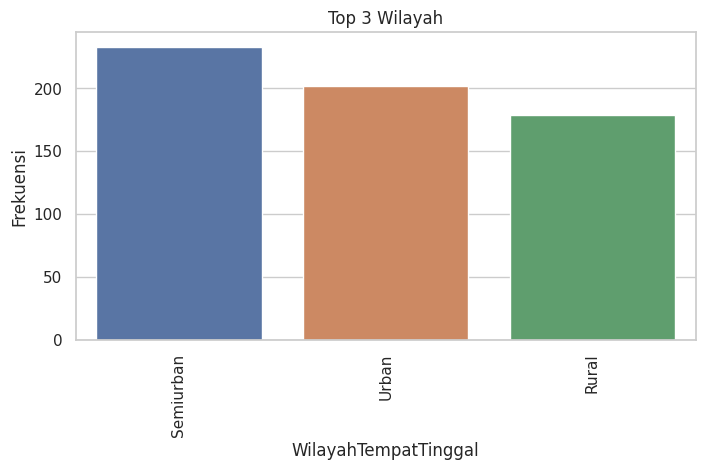

In [43]:
country_count = Counter(df['WilayahTempatTinggal'].dropna().tolist()).most_common(3)
country_idx = [country[0] for country in country_count]
country_val = [country[1] for country in country_count]
fig,ax = plt.subplots(figsize=(8,4))
sns.barplot(x = country_idx,y=country_val ,ax =ax)
plt.title('Top 3 Wilayah')
plt.xlabel('WilayahTempatTinggal')
plt.ylabel('Frekuensi')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

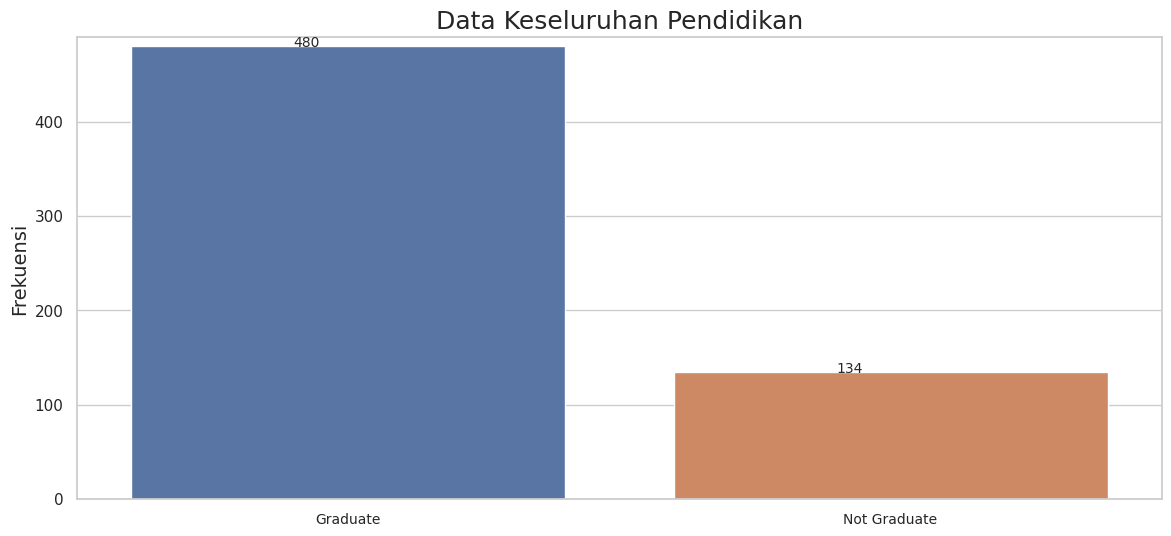

In [44]:
fig, ax = plt.subplots(figsize = (14, 6))
max_width = 13

index = df['Pendidikan'].fillna('NaN').value_counts().index[0:4]
count = df['Pendidikan'].fillna('NaN').value_counts()[0:4]
sns.barplot(x = index, y = count, order = index)
ax.set_title('Data Keseluruhan Pendidikan', fontsize = 18)
ax.set_xticklabels((textwrap.fill(x, max_width) for x in index), fontsize = 10)
for i, count in enumerate(count):
    ax.text(x=i-0.1 , y =count+0 , s=f"{count}" , fontdict=dict(fontsize=10))
ax.set_ylabel('Frekuensi', fontsize = 14)
ax.set_ylim(0, df['Pendidikan'].fillna('NaN').value_counts()[0]+10)

plt.show()

# Visualisasi Distribution

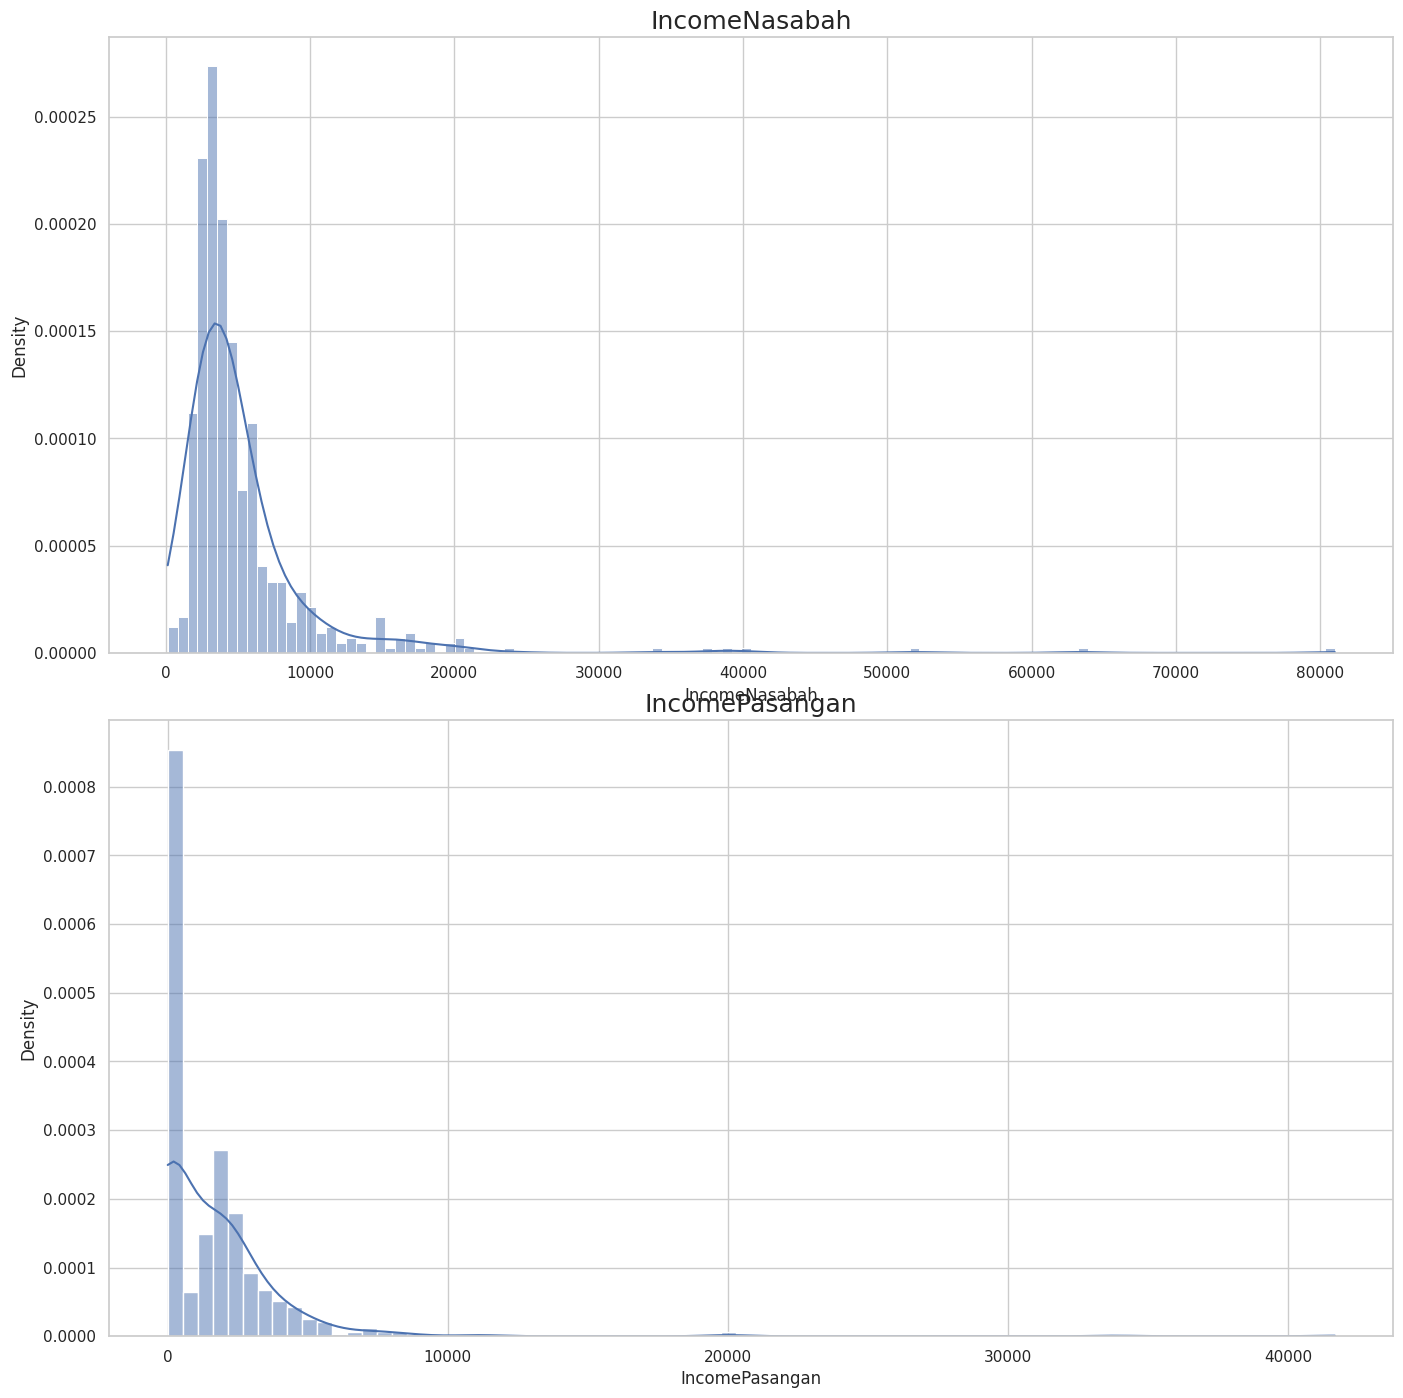

In [45]:
# Mendefinisikan kolom pada list dari dataset
num_cols = ['IncomeNasabah', 'IncomePasangan']

# Membuat diagram
fig, ax = plt.subplots(2, figsize=(14, 14))
fig.tight_layout(pad=2)

for ax, col in zip(ax.flatten(), num_cols):
    sns.histplot(ax=ax, data=df, x=col, kde=True, stat='density')
    ax.set_title(col, fontsize=18)

plt.show()

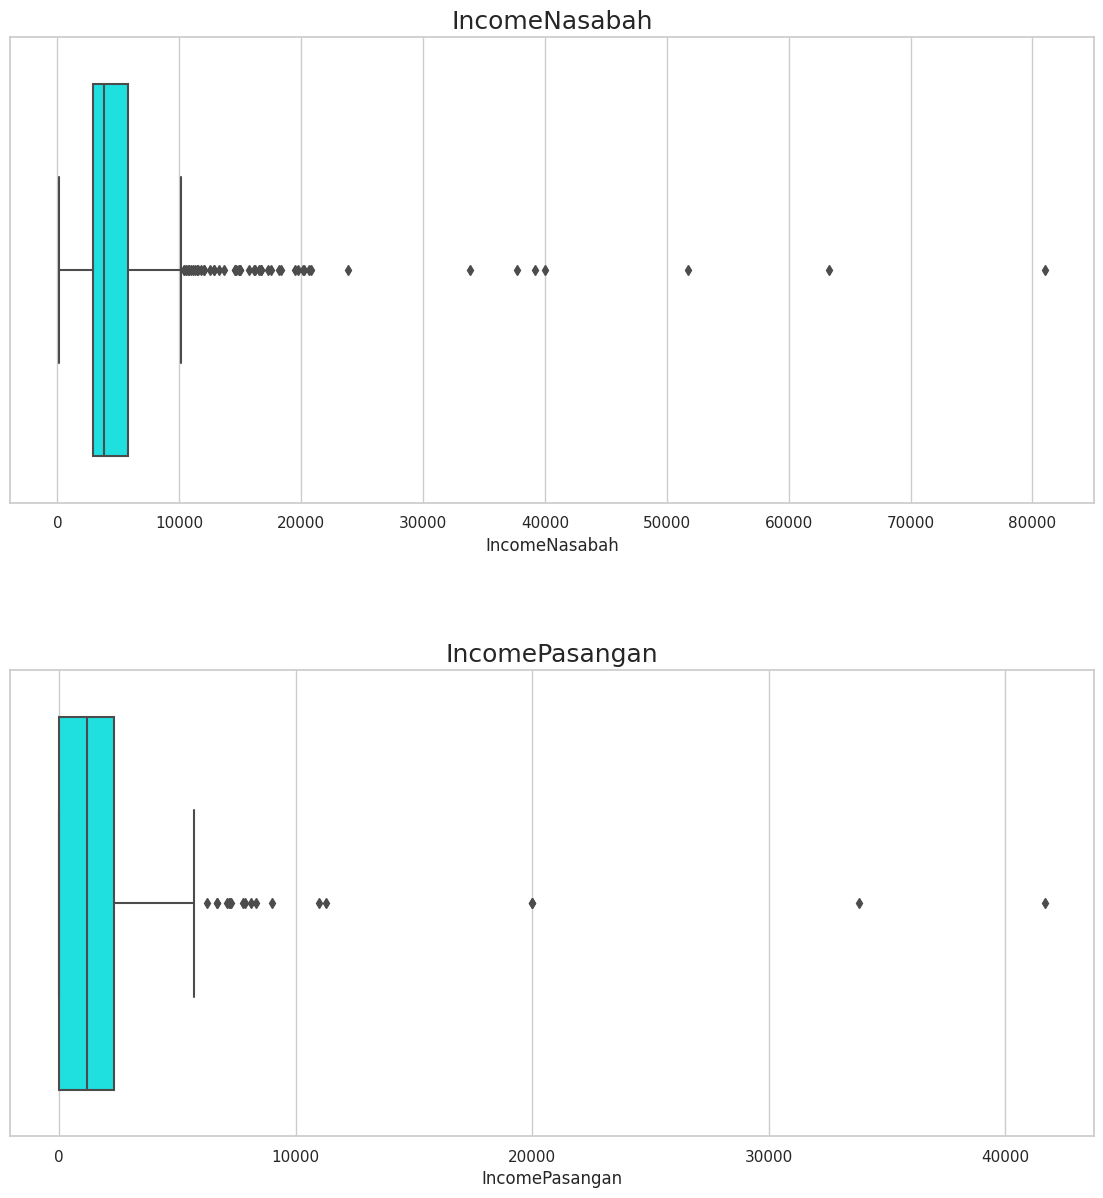

In [46]:
num_cols = ['IncomeNasabah', 'IncomePasangan']

fig, ax = plt.subplots(len(num_cols), 1, figsize = (14, 14))
fig.tight_layout(pad = 8)

for i, col in enumerate(num_cols):
    sns.boxplot(ax = ax[i], x = df[col], orient = 'h', color = 'aqua')
    ax[i].set_title(col, fontsize = 18)

plt.show()

# Visualisasi Relationship

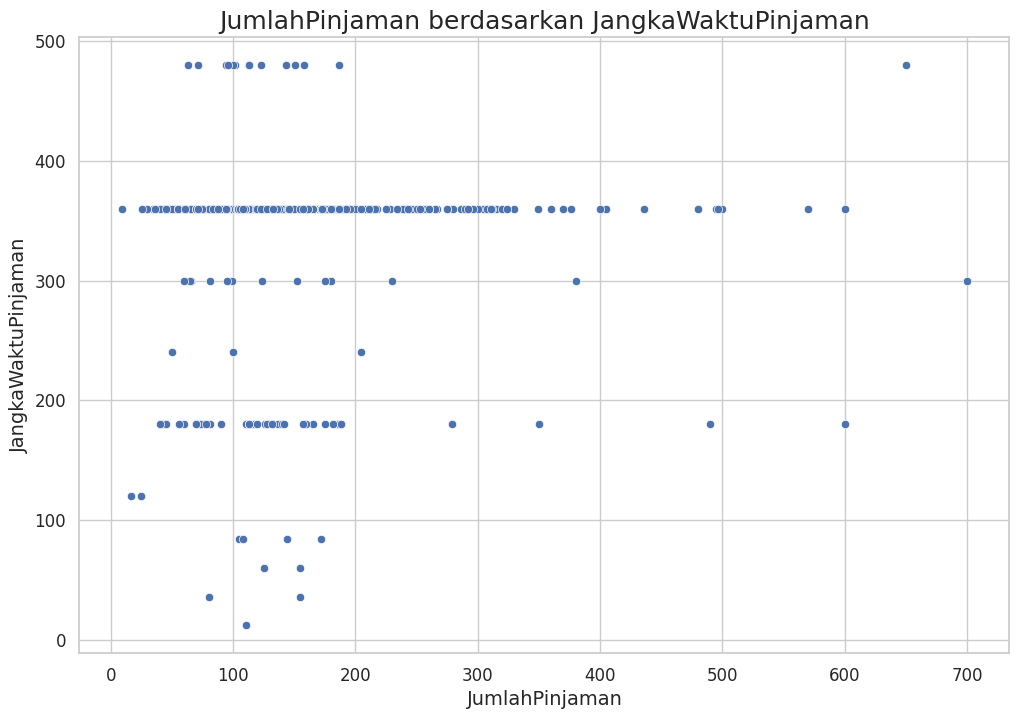

In [47]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(data=df, x="JumlahPinjaman", y="JangkaWaktuPinjaman")
ax.set_title('JumlahPinjaman berdasarkan JangkaWaktuPinjaman', fontsize=18)
ax.set_xlabel('JumlahPinjaman', fontsize=14)
ax.set_ylabel('JangkaWaktuPinjaman', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Visualisasi Composition

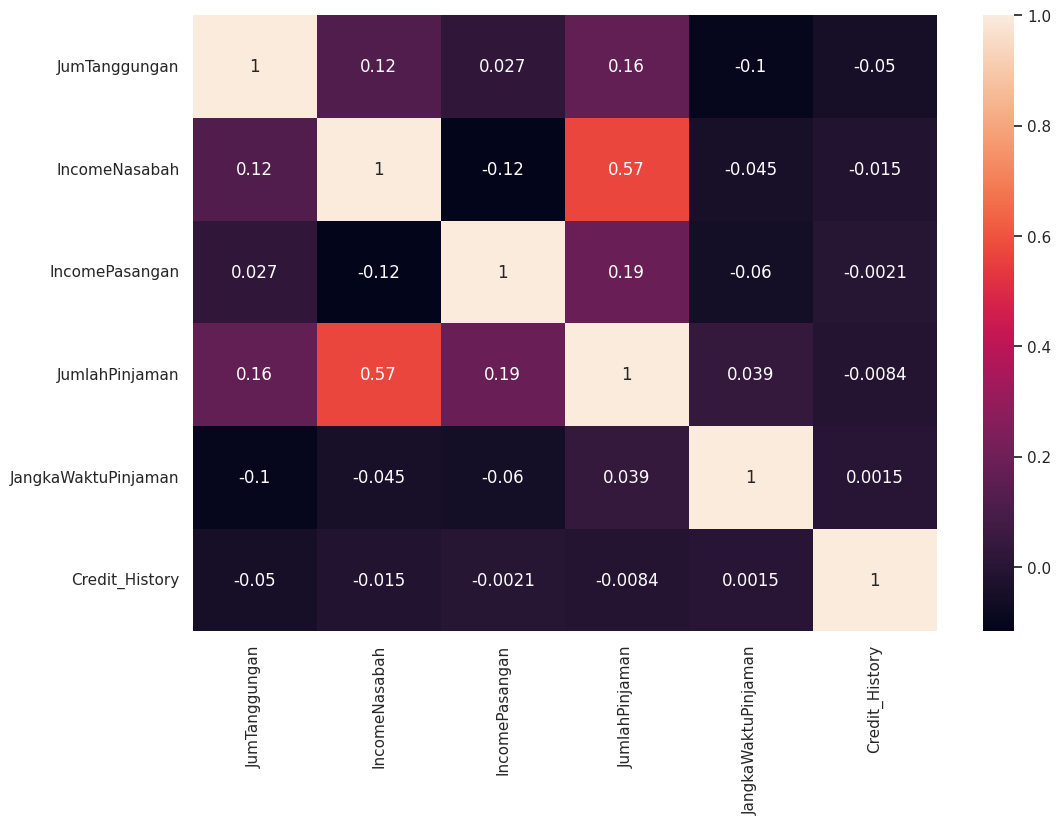

In [48]:
cormat = df.corr()
fig, ax = plt.subplots(figsize = (12, 8))
sns.heatmap(ax = ax, data = cormat, annot = True)
ax.set_yticklabels(cormat.columns, rotation = 0)
plt.show()

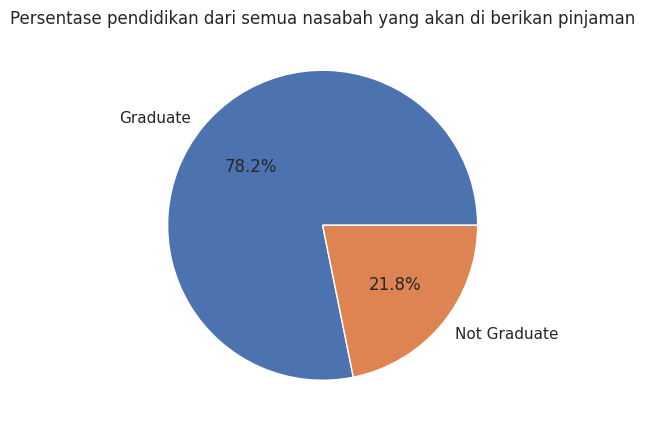

In [53]:
#Calculate count of each Level category
level_count = df['Pendidikan'].value_counts()

#Create pie chart for Level categories
fig, ax = plt.subplots(figsize=(5, 8))
ax.pie(level_count, labels=level_count.index, autopct='%1.1f%%')
ax.set_title('Persentase pendidikan dari semua nasabah yang akan di berikan pinjaman')
plt.show()

# Verify Data Quality

In [54]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 ID_Nasabah               0
JenisKelamin            13
StatusPernikahan         3
JumTanggungan           15
Pendidikan               0
Wiraswasta              32
IncomeNasabah            0
IncomePasangan           0
JumlahPinjaman          22
JangkaWaktuPinjaman     14
Credit_History          50
WilayahTempatTinggal     0
StatusPinjaman           0
dtype: int64


In [55]:
# Check for duplicates
duplicate_rows = df.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

Number of duplicate rows: 0


In [56]:
# Check for outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print("Outliers:\n", outliers)

Outliers:
 Credit_History          89
ID_Nasabah               0
IncomeNasabah           50
IncomePasangan          18
JangkaWaktuPinjaman     88
JenisKelamin             0
JumTanggungan            0
JumlahPinjaman          39
Pendidikan               0
StatusPernikahan         0
StatusPinjaman           0
WilayahTempatTinggal     0
Wiraswasta               0
dtype: int64


<ipython-input-56-650d731e3b3f>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()


In [57]:
# Check data types
print("Data types:\n", df.dtypes)

Data types:
 ID_Nasabah               object
JenisKelamin             object
StatusPernikahan         object
JumTanggungan           float64
Pendidikan               object
Wiraswasta               object
IncomeNasabah             int64
IncomePasangan            int64
JumlahPinjaman          float64
JangkaWaktuPinjaman     float64
Credit_History          float64
WilayahTempatTinggal     object
StatusPinjaman           object
dtype: object


# Data Preparation

# Select Data

In [61]:
import pandas as pd

In [62]:
df = pd.read_csv("dataset-pinjaman-nasabah.csv")

In [63]:
# Membuat hanya menampikan 2 Kolom
selected_data = df[["JenisKelamin", "Pendidikan"]]

# Menampilkan Perintah
print(selected_data.head())

  JenisKelamin    Pendidikan
0         Male      Graduate
1         Male      Graduate
2         Male      Graduate
3         Male  Not Graduate
4         Male      Graduate


In [64]:
# Membuat hanya menampikan 3 Kolom
selected_data = df[["JenisKelamin", "Pendidikan", "Wiraswasta"]]

# Menampilkan Perintah
print(selected_data.head())

  JenisKelamin    Pendidikan Wiraswasta
0         Male      Graduate         No
1         Male      Graduate         No
2         Male      Graduate        Yes
3         Male  Not Graduate         No
4         Male      Graduate         No


# Clean Data

In [65]:
df.isna().sum()

ID_Nasabah               0
JenisKelamin            13
StatusPernikahan         3
JumTanggungan           15
Pendidikan               0
Wiraswasta              32
IncomeNasabah            0
IncomePasangan           0
JumlahPinjaman          22
JangkaWaktuPinjaman     14
Credit_History          50
WilayahTempatTinggal     0
StatusPinjaman           0
dtype: int64

In [66]:
df.isna().sum() / len(df) * 100

ID_Nasabah              0.000000
JenisKelamin            2.117264
StatusPernikahan        0.488599
JumTanggungan           2.442997
Pendidikan              0.000000
Wiraswasta              5.211726
IncomeNasabah           0.000000
IncomePasangan          0.000000
JumlahPinjaman          3.583062
JangkaWaktuPinjaman     2.280130
Credit_History          8.143322
WilayahTempatTinggal    0.000000
StatusPinjaman          0.000000
dtype: float64

In [67]:
df["Pendidikan"] = df["Pendidikan"].fillna(df["Pendidikan"].mode()[0])
df["JenisKelamin"] = df["JenisKelamin"].fillna(df["JenisKelamin"].mode()[0])

In [68]:
df.isna().sum()

ID_Nasabah               0
JenisKelamin             0
StatusPernikahan         3
JumTanggungan           15
Pendidikan               0
Wiraswasta              32
IncomeNasabah            0
IncomePasangan           0
JumlahPinjaman          22
JangkaWaktuPinjaman     14
Credit_History          50
WilayahTempatTinggal     0
StatusPinjaman           0
dtype: int64

In [69]:
df.isna().sum() / len(df) * 100

ID_Nasabah              0.000000
JenisKelamin            0.000000
StatusPernikahan        0.488599
JumTanggungan           2.442997
Pendidikan              0.000000
Wiraswasta              5.211726
IncomeNasabah           0.000000
IncomePasangan          0.000000
JumlahPinjaman          3.583062
JangkaWaktuPinjaman     2.280130
Credit_History          8.143322
WilayahTempatTinggal    0.000000
StatusPinjaman          0.000000
dtype: float64

# Construct Data

In [70]:
import pandas as pd

In [71]:
df = pd.read_csv("dataset-pinjaman-nasabah.csv")

In [76]:
# Buat fitur baru yang menghitung selisih nilai maksimum dan minimum 
df["Credit_History"]

# Menampilkan beberapa baris pertama dari kumpulan data yang dimodifikasi
print(df.head())

  ID_Nasabah JenisKelamin StatusPernikahan  JumTanggungan    Pendidikan  \
0   LP001002         Male               No            0.0      Graduate   
1   LP001003         Male              Yes            1.0      Graduate   
2   LP001005         Male              Yes            0.0      Graduate   
3   LP001006         Male              Yes            0.0  Not Graduate   
4   LP001008         Male               No            0.0      Graduate   

  Wiraswasta  IncomeNasabah  IncomePasangan  JumlahPinjaman  \
0         No           5849               0             NaN   
1         No           4583            1508           128.0   
2        Yes           3000               0            66.0   
3         No           2583            2358           120.0   
4         No           6000               0           141.0   

   JangkaWaktuPinjaman  Credit_History WilayahTempatTinggal StatusPinjaman  
0                360.0             1.0                Urban              Y  
1               

In [83]:
import pandas as pd

# Membaca dataset 
df = pd.read_csv('dataset-pinjaman-nasabah.csv')

# Mengubah nilai kategori menjadi numerik pada kolom IncomePasangan
df['IncomePasangan'] = df['IncomePasangan'].map({'0 1': 0, '1508 2': 1})

# Menghapus kolom-kolom yang tidak diperlukan 
df = df.drop(['JumTanggungan'], axis=1)

# Menampilkan lima baris pertama dari dataset yang telah diproses
print(df.head())

  ID_Nasabah JenisKelamin StatusPernikahan    Pendidikan Wiraswasta  \
0   LP001002         Male               No      Graduate         No   
1   LP001003         Male              Yes      Graduate         No   
2   LP001005         Male              Yes      Graduate        Yes   
3   LP001006         Male              Yes  Not Graduate         No   
4   LP001008         Male               No      Graduate         No   

   IncomeNasabah  IncomePasangan  JumlahPinjaman  JangkaWaktuPinjaman  \
0           5849             NaN             NaN                360.0   
1           4583             NaN           128.0                360.0   
2           3000             NaN            66.0                360.0   
3           2583             NaN           120.0                360.0   
4           6000             NaN           141.0                360.0   

   Credit_History WilayahTempatTinggal StatusPinjaman  
0             1.0                Urban              Y  
1             1.0     

# Integrate Data

In [84]:
df = pd.read_csv('dataset-pinjaman-nasabah.csv')

# Melakukan perubahan pada nilai data tertentu
df.loc[df['JumlahPinjaman'] == 'nilai_awal', 'JumlahPinjaman'] = 'nilai_baru'

# Melakukan penghapusan kolom yang tidak diperlukan
df = df.drop(['JumTanggungan'], axis=1)

# Menyimpan dataset yang telah diubah
df.to_csv('integrity data.csv', index=False)

print("Berhasil membuat dataset baru dan menambahkan 1 kolom baru yaitu total pinjaman")

Berhasil membuat dataset baru dan menambahkan 1 kolom baru yaitu total pinjaman


In [85]:
df

,ID_Nasabah,JenisKelamin,StatusPernikahan,Pendidikan,Wiraswasta,IncomeNasabah,IncomePasangan,JumlahPinjaman,JangkaWaktuPinjaman,Credit_History,WilayahTempatTinggal,StatusPinjaman
0,LP001002,Male,No,Graduate,No,5849,0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,Graduate,No,4583,1508,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,Graduate,Yes,3000,0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,Not Graduate,No,2583,2358,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,Graduate,No,6000,0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,Graduate,No,2900,0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,Graduate,No,4106,0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,Graduate,No,8072,240,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,Graduate,No,7583,0,187.0,360.0,1.0,Urban,Y


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Nasabah            614 non-null    object 
 1   JenisKelamin          601 non-null    object 
 2   StatusPernikahan      611 non-null    object 
 3   Pendidikan            614 non-null    object 
 4   Wiraswasta            582 non-null    object 
 5   IncomeNasabah         614 non-null    int64  
 6   IncomePasangan        614 non-null    int64  
 7   JumlahPinjaman        592 non-null    object 
 8   JangkaWaktuPinjaman   600 non-null    float64
 9   Credit_History        564 non-null    float64
 10  WilayahTempatTinggal  614 non-null    object 
 11  StatusPinjaman        614 non-null    object 
dtypes: float64(2), int64(2), object(8)
memory usage: 57.7+ KB


# Format Data

In [87]:
df = pd.read_csv('dataset-pinjaman-nasabah.csv')

# Menghapus kolom yang tidak diperlukan
df = df.drop(['JumTanggungan'], axis=1)

# Mengganti nilai null dengan nilai rata-rata
mean_value = df['JumlahPinjaman'].mean()
df['JumlahPinjaman'] = df['JumlahPinjaman'].fillna(mean_value)

# Mengubah tipe data JumTanggungan dari string ke integer
df['JumlahPinjaman'] = df['JumlahPinjaman'].astype(int)

# Menghapus baris yang duplikat
df = df.drop_duplicates()

# Mengurutkan data berdasarkan kolom5
df = df.sort_values('JumlahPinjaman')

# Menyimpan hasil pengolahan data ke file csv
df.to_csv('data_cleaned.csv', index=False)

In [88]:
df

,ID_Nasabah,JenisKelamin,StatusPernikahan,Pendidikan,Wiraswasta,IncomeNasabah,IncomePasangan,JumlahPinjaman,JangkaWaktuPinjaman,Credit_History,WilayahTempatTinggal,StatusPinjaman
568,LP002840,Female,No,Graduate,No,2378,0,9,360.0,1.0,Urban,N
14,LP001030,Male,Yes,Graduate,No,1299,1086,17,120.0,1.0,Urban,Y
94,LP001325,Male,No,Not Graduate,No,3620,0,25,120.0,1.0,Semiurban,Y
133,LP001482,Male,Yes,Graduate,Yes,3459,0,25,120.0,1.0,Semiurban,Y
555,LP002792,Male,Yes,Graduate,No,5468,1032,26,360.0,1.0,Semiurban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
369,LP002191,Male,Yes,Graduate,No,19730,5266,570,360.0,1.0,Rural,N
561,LP002813,Female,Yes,Graduate,Yes,19484,0,600,360.0,1.0,Semiurban,Y
155,LP001536,Male,Yes,Graduate,No,39999,0,600,180.0,0.0,Semiurban,Y
130,LP001469,Male,No,Graduate,Yes,20166,0,650,480.0,NaN,Urban,Y


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 568 to 171
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Nasabah            614 non-null    object 
 1   JenisKelamin          601 non-null    object 
 2   StatusPernikahan      611 non-null    object 
 3   Pendidikan            614 non-null    object 
 4   Wiraswasta            582 non-null    object 
 5   IncomeNasabah         614 non-null    int64  
 6   IncomePasangan        614 non-null    int64  
 7   JumlahPinjaman        614 non-null    int64  
 8   JangkaWaktuPinjaman   600 non-null    float64
 9   Credit_History        564 non-null    float64
 10  WilayahTempatTinggal  614 non-null    object 
 11  StatusPinjaman        614 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 62.4+ KB
